In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#create dataset 
df = pd. DataFrame ({'interrupciones': [5, 10, 10, 15, 15, 20, 20, 25, 25, 30],
                   'calificacion': [58, 41, 45, 27, 26, 12, 16, 3, 5, 2]})
      

#ver las primeras seis filas del conjunto de datos
df[0: 10]

,interrupciones,calificacion
0,5,58
1,10,41
2,10,45
3,15,27
4,15,26
5,20,12
6,20,16
7,25,3
8,25,5
9,30,2


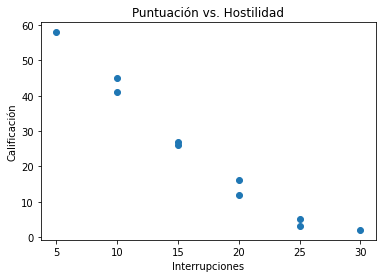

In [4]:
plt.scatter (df.interrupciones, df.calificacion)
plt.title ('Puntuación vs. Hostilidad')
plt.xlabel ('Interrupciones')
plt.ylabel ('Calificación')
plt.show ()

[1 2 2 2 2 1]
1


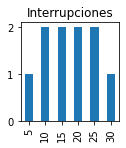

In [24]:
# Dispersion, subplots
plt.subplot(2,3,1)

# how many alumns are married
count = df['interrupciones'].value_counts()
count.iloc[0] = 1
count.iloc[4] = 2
count.index = [5, 10, 15, 20, 25, 30]
print(count.values)
print(count.iloc[0])
plot = count.plot(kind='bar', title='Interrupciones')

In [ ]:
df.plot.box(column = ['calificacion'])

In [25]:
import seaborn as sns

c:\Users\yanin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


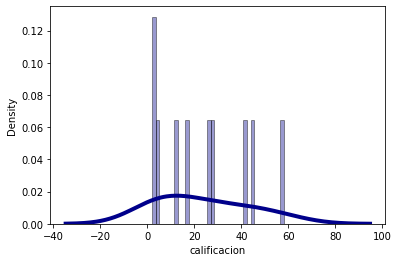

In [26]:
sns.distplot(df['calificacion'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

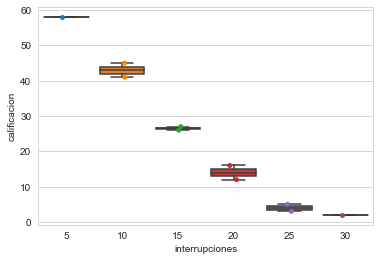

In [27]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='interrupciones',y='calificacion',data=df)
ax = sns.stripplot(x="interrupciones", y="calificacion",data=df)

In [28]:
import statsmodels.api as sm

#define la variable de respuesta
y = df['calificacion']

#definir variable explicativa
x = df[['interrupciones']]

#add constante a las variables predictoras
x = sm.add_constant(x)

#fit modelo de regresión lineal
model = sm.OLS(y, x).fit()

#ver impresión de resumen del modelo
model.summary ()

c:\Users\yanin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           calificacion   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     158.9
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           1.47e-06
Time:                        19:27:22   Log-Likelihood:                -28.130
No. Observations:                  10   AIC:                             60.26
Df Residuals:                       8   BIC:                             60.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             65.4222      3.618     18.083      0.000      57.079      73.765
interrupciones    -2.3956      0.190    -12.607      0.000      -2.834      -1.957
==============================================================================
Omnibus:                        1.902   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.026
Skew:                           0.757   Prob(JB):                        0.599
Kurtosis:                       2.586   Cond. No.                         48.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Puntuación: 65,4222 - 2,3956 * (x) 
### x = interrupciones 

eval_env: 1


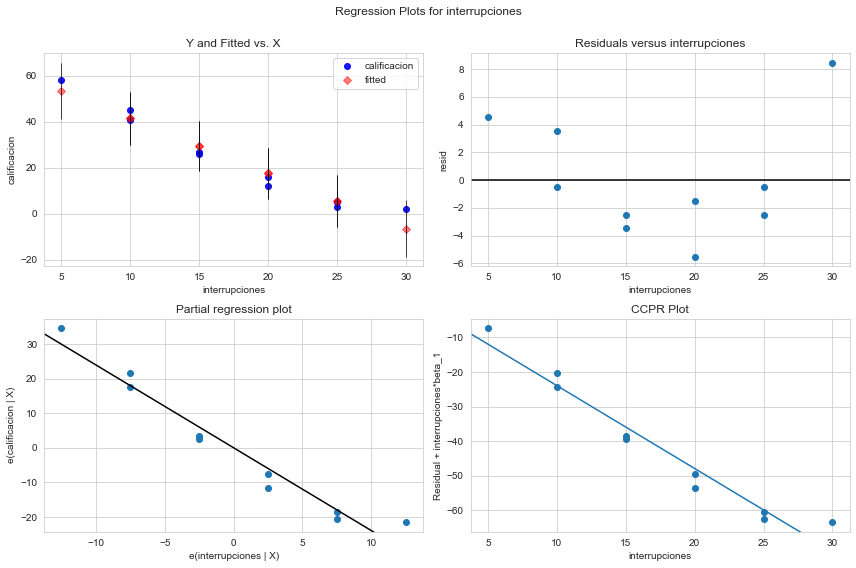

In [29]:
#define el tamaño de la figura
fig = plt.figure(figsize = (12,8))

#producir gráficos residuales
fig = sm.graphics.plot_regress_exog(model, 'interrupciones', fig = fig)

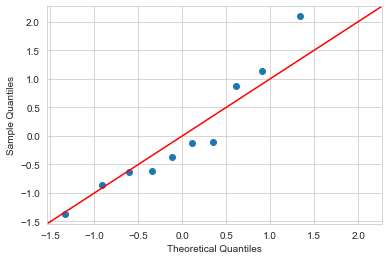

In [30]:
#definir residuales
res = model.resid

#create QQ plot
fig = sm.qqplot(res, fit = True , line = '45')
# fig = sm.qqplot(df, line = '45')
plt.show () 

In [31]:
import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

# Creo un modelo de regresión lineal
modelo = linear_model.LinearRegression()

# Entreno el modelo con los datos (X,Y)
modelo.fit(x, y)
# Ahora puedo obtener el coeficiente b_1
print('Coeficiente beta1: ', modelo.coef_[0])

# Podemos predecir usando el modelo
y_pred = modelo.predict(x)

# Por último, calculamos el error cuadrático medio y el estadístico R^2
print('Error cuadrático medio: %.2f' % mean_squared_error(y, y_pred))
print('Estadístico R_2: %.2f' % r2_score(y, y_pred))


Coeficiente beta1:  0.0
Error cuadrático medio: 16.25
Estadístico R_2: 0.95
